# Milestone 1 - Exploratory Data Analysis (EDA)
This notebook contains the exploratory data analysis of the Smart Logistics Dataset. The goal is to understand the data, clean it properly, and prepare it for modeling in the next phase.


## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for better plots
%matplotlib inline
sns.set_style('whitegrid')


## Load Dataset

In [6]:
# Load dataset
data = pd.read_csv('../data/smart_logistics_dataset.csv')  # Adjust if your path is different
data.head()


,Timestamp,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
0,2024-03-20 00:11:14,Truck_7,-65.7383,11.2497,390,Delayed,27.0,67.8,Detour,38,320,4,NaN,60.1,285,1
1,2024-10-30 07:53:51,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
2,2024-07-29 18:42:48,Truck_10,54.9232,79.5455,190,In Transit,25.2,62.2,Detour,34,355,3,NaN,99.2,260,0
3,2024-10-28 00:50:54,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
4,2024-09-27 15:52:58,Truck_7,-65.8477,47.9468,480,Delayed,20.5,57.2,Clear,56,197,6,NaN,71.6,270,1


## Data Understanding

In [8]:
# General Information
data.info()

# Summary statistics
data.describe()

# Column names
print(data.columns)

# Dataset shape
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                1000 non-null   object 
 1   Asset_ID                 1000 non-null   object 
 2   Latitude                 1000 non-null   float64
 3   Longitude                1000 non-null   float64
 4   Inventory_Level          1000 non-null   int64  
 5   Shipment_Status          1000 non-null   object 
 6   Temperature              1000 non-null   float64
 7   Humidity                 1000 non-null   float64
 8   Traffic_Status           1000 non-null   object 
 9   Waiting_Time             1000 non-null   int64  
 10  User_Transaction_Amount  1000 non-null   int64  
 11  User_Purchase_Frequency  1000 non-null   int64  
 12  Logistics_Delay_Reason   737 non-null    object 
 13  Asset_Utilization        1000 non-null   float64
 14  Demand_Forecast          

In [9]:
# Convert Timestamp to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])


In [10]:
# Fill missing Logistics_Delay_Reason with 'Unknown'
data['Logistics_Delay_Reason'] = data['Logistics_Delay_Reason'].fillna('Unknown')

In [11]:
# Confirm no missing values
print(data.isnull().sum())

Timestamp                  0
Asset_ID                   0
Latitude                   0
Longitude                  0
Inventory_Level            0
Shipment_Status            0
Temperature                0
Humidity                   0
Traffic_Status             0
Waiting_Time               0
User_Transaction_Amount    0
User_Purchase_Frequency    0
Logistics_Delay_Reason     0
Asset_Utilization          0
Demand_Forecast            0
Logistics_Delay            0
dtype: int64


In [12]:
# Check for duplicates
print(f"Duplicate rows: {data.duplicated().sum()}")

Duplicate rows: 0


# Univariate Analysis Section (for EDA)
### Goal:
- Look at one variable at a time.
- Understand the distribution of:
  - Numerical features (e.g., waiting_Time, Temperature)
  - Categorical features (e.g., Shipment_Status, Traffic_Status)

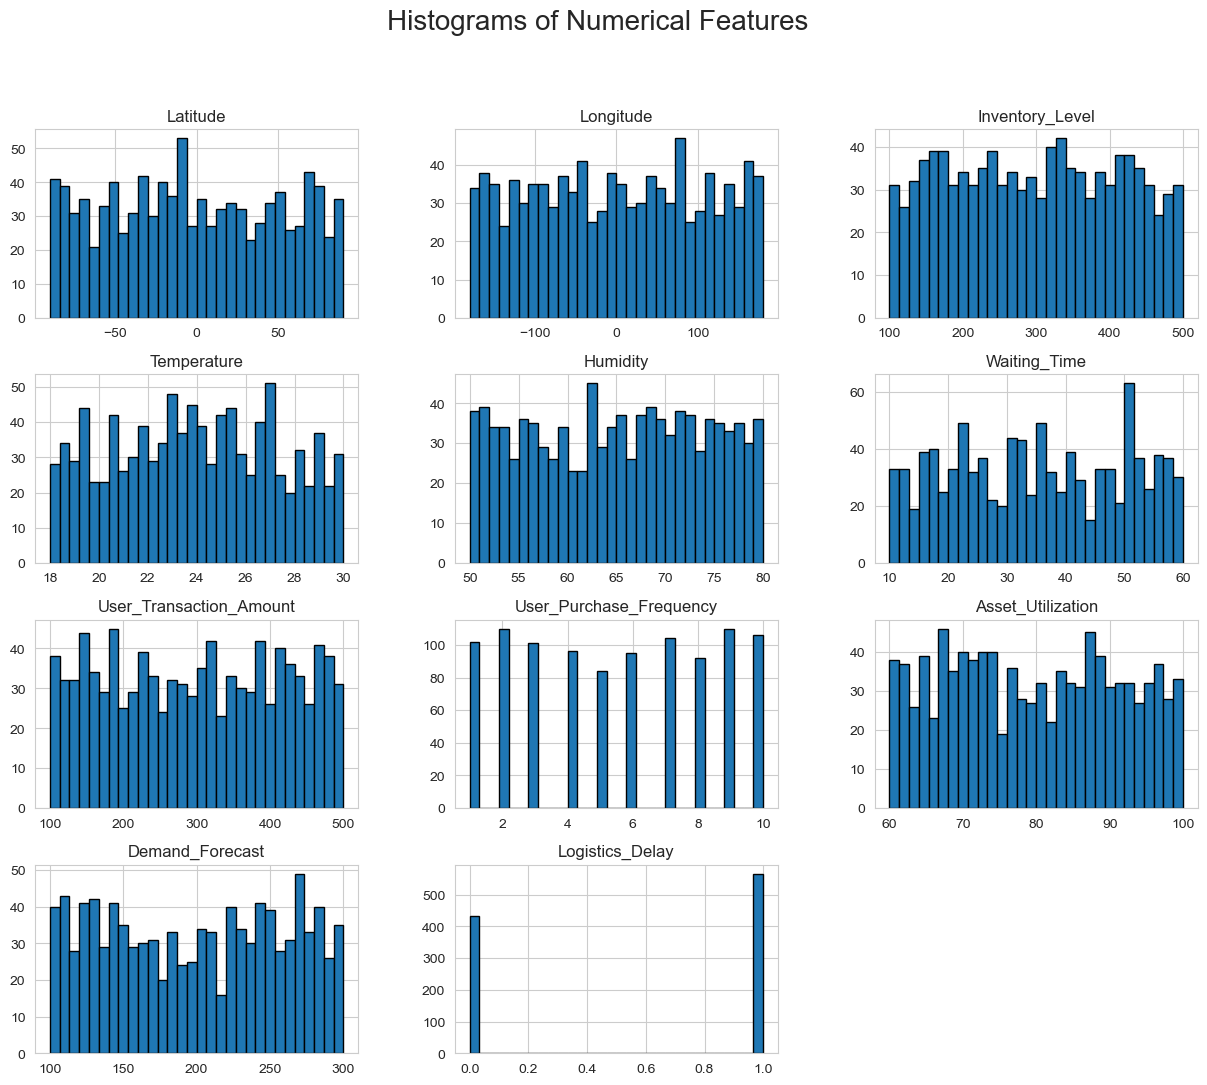

In [14]:
# Select only numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for all numerical features
data[numerical_cols].hist(bins=30, figsize=(15, 12), edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=20)
plt.show()


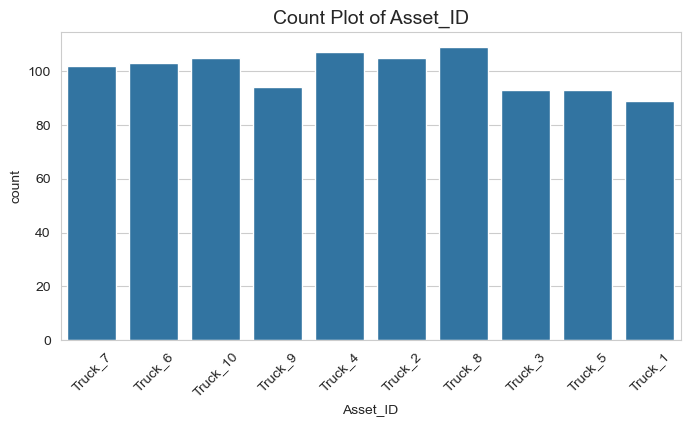

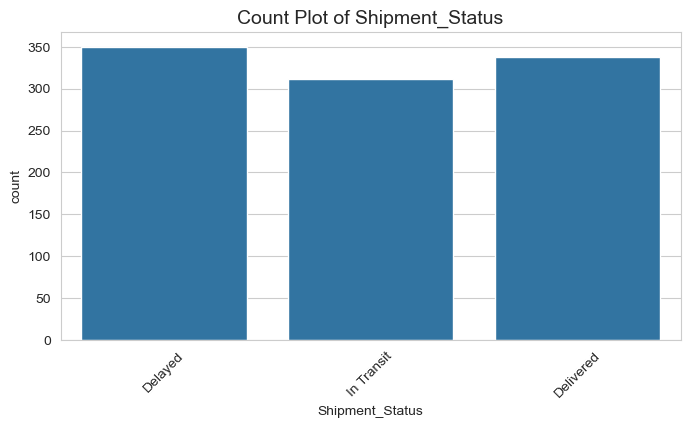

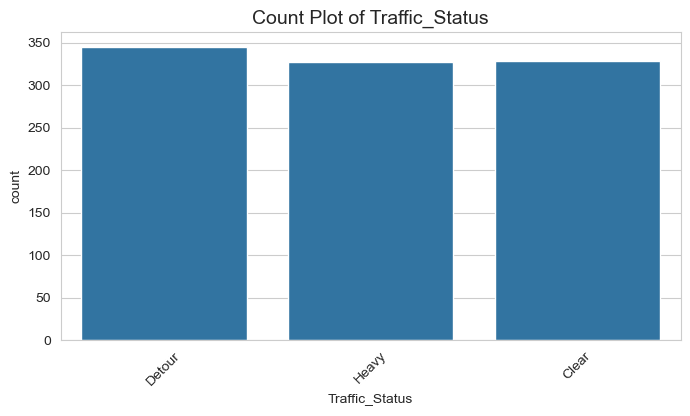

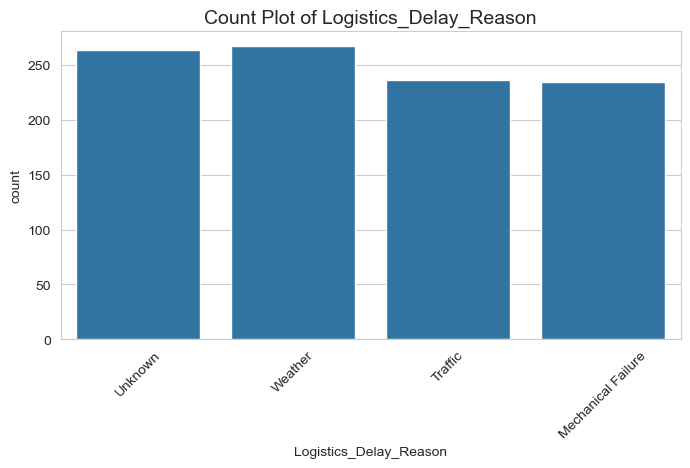

In [15]:
# Select only categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Plot countplots for categorical features
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=data)
    plt.title(f'Count Plot of {col}', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()


## Observations from Univariate Analysis

- **Asset_ID**: The number of assets is fairly evenly distributed among different trucks, with Truck-7 slightly having the highest count.
- **Shipment_Status**: Most shipments are either "Delayed" or "Delivered", with "In Transit" having the least number.
- **Traffic_Status**: Distribution is fairly balanced among "Detour", "Heavy", and "Clear" traffic conditions.
- **Logistics_Delay_Reason**: Missing delay reasons were filled as "Unknown", and Weather is the most common known cause of delay.
- **Latitude and Longitude**: Asset locations are spread widely across different geographic coordinates.
- **Inventory_Level, Temperature, Humidity, Waiting_Time, Asset_Utilization**: These variables appear fairly uniformly distributed — no obvious extreme outliers.
- **User_Transaction_Amount and User_Purchase_Frequency**: Transaction amounts and purchase frequency are quite evenly spread but show mild grouping at specific intervals.
- **Demand_Forecast**: Forecasted demand is spread between 100 and 300 units, with no clear peaks.
- **Logistics_Delay**: This variable is binary — most entries are either 0 or 1, indicating whether a delay happened or not.


In [17]:
#Extract time-based features
data['Hour'] = data['Timestamp'].dt.hour # Hour of the day
data['DayOfWeek'] = data['Timestamp'].dt.day_name() # Day name (e.g., Monday)
data['Month'] = data['Timestamp'].dt.month # This will display the month as numbers

In [18]:
#Efficiency Ratio (this helps to see how well inventory meets demand)
data['Efficiency_Ratio'] = data['Demand_Forecast']/data['Inventory_Level']
data['Efficiency_Ratio']


0      0.730769
1      0.354379
2      1.368421
3      0.484848
4      0.562500
         ...   
995    0.806818
996    0.567850
997    0.792507
998    0.876812
999    0.898089
Name: Efficiency_Ratio, Length: 1000, dtype: float64

In [19]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Shipment_Status', 'Traffic_Status', 'Logistics_Delay_Reason']
encoder = LabelEncoder()

for col in label_cols:
    data[col] = encoder.fit_transform(data[col])


In [20]:
#Delay Reason Flag (0 if there is no reason and 1 if there is, like 'Weather', 'Traffic', etc.)
data['Has_Delay_Reason'] = data['Logistics_Delay_Reason'].apply(lambda x: 0 if x == 'None' else 1)

In [21]:
#Categorize traffic severity for analysis
def traffic_level(x):
    if x == 'Clear':
        return 'Low'
    elif x == 'Detour':
        return 'Medium'
    else:
        return "High"

data['Traffic_Level'] = data['Traffic_Status'].apply(traffic_level)

In [22]:
#Categorize inventory level into 'Low', 'Medium', 'High'
data['Inventory_Category'] = pd.cut (
    data['Inventory_Level'],
    bins = [0, 200, 350, 500],
    labels =['Low', 'Medium', 'High']
)

In [23]:
print(data.head())

            Timestamp  Asset_ID  Latitude  Longitude  Inventory_Level  \
0 2024-03-20 00:11:14   Truck_7  -65.7383    11.2497              390   
1 2024-10-30 07:53:51   Truck_6   22.2748  -131.7086              491   
2 2024-07-29 18:42:48  Truck_10   54.9232    79.5455              190   
3 2024-10-28 00:50:54   Truck_9   42.3900    -1.4788              330   
4 2024-09-27 15:52:58   Truck_7  -65.8477    47.9468              480   

   Shipment_Status  Temperature  Humidity  Traffic_Status  Waiting_Time  ...  \
0                0         27.0      67.8               1            38  ...   
1                2         22.5      54.3               2            16  ...   
2                2         25.2      62.2               1            34  ...   
3                1         25.4      52.3               2            37  ...   
4                0         20.5      57.2               0            56  ...   

   Asset_Utilization  Demand_Forecast  Logistics_Delay  Hour  DayOfWeek  \
0    

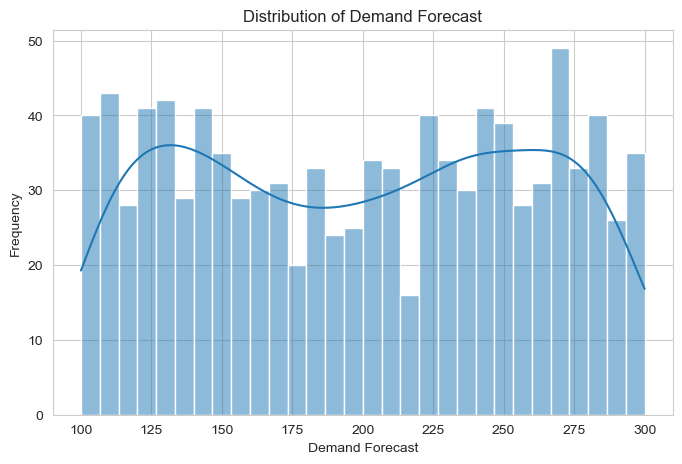

In [24]:
#Distribution of Demand Forecast
plt.figure(figsize = (8,5))
sns.histplot(data['Demand_Forecast'], bins = 30, kde = True)
plt.title('Distribution of Demand Forecast')
plt.xlabel('Demand Forecast')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Basic descriptive statistics
desc = data['Demand_Forecast'].describe()

# Skewness
skew = data['Demand_Forecast'].skew()

# Percentage of values between 150 and 275
range_min, range_max = 150, 275
in_range_count = data[(data['Demand_Forecast'] >= range_min) & (data['Demand_Forecast'] <= range_max)].shape[0]
total = data.shape[0]
in_range_pct = (in_range_count / total) * 100

# Display results
print("Demand Forecast Summary:")
print(f"Count           : {desc['count']}")
print(f"Mean            : {desc['mean']:.2f}")
print(f"Median (50%)    : {desc['50%']:.2f}")
print(f"Std Deviation   : {desc['std']:.2f}")
print(f"Min             : {desc['min']}")
print(f"25th Percentile : {desc['25%']}")
print(f"75th Percentile : {desc['75%']}")
print(f"Max             : {desc['max']}")
print(f"Skewness        : {skew:.4f}")
print(f"% between {range_min} and {range_max}: {in_range_pct:.1f}%")

Demand Forecast Summary:
Count           : 1000.0
Mean            : 199.28
Median (50%)    : 202.00
Std Deviation   : 59.92
Min             : 100.0
25th Percentile : 144.0
75th Percentile : 251.25
Max             : 300.0
Skewness        : -0.0168
% between 150 and 275: 59.5%


### Distribution of Demand Forecast
- Most demand forecast values fall between **150 and 275 units**, covering nearly **60%** of the dataset.
- The average demand is around **199**, and the **median is 202**, suggesting a balanced, symmetric distribution.
- There is **no significant skew**, indicating consistent forecasting behavior without extreme bias.
- This range gives us a reliable **baseline expectation** when building demand forecasting models.


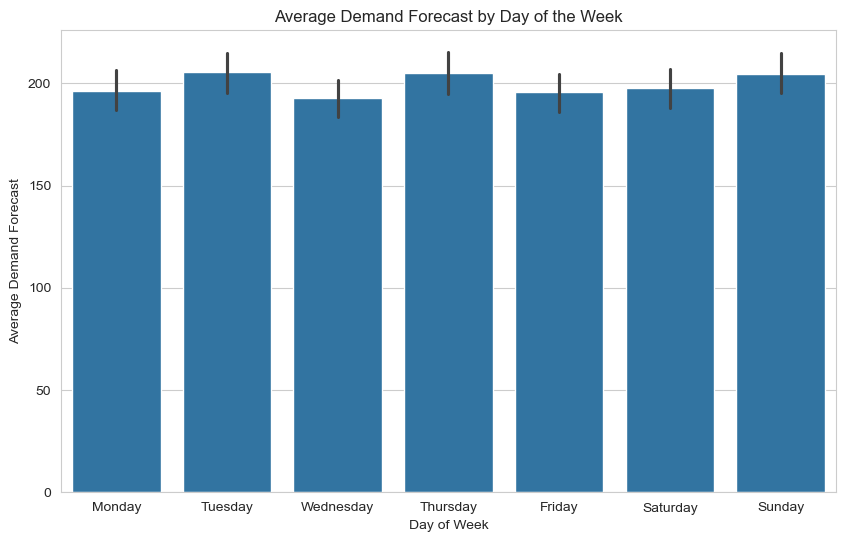

In [27]:
#Average Demand Forecast by Day fo the Week
plt.figure(figsize = (10, 6))
sns.barplot (
    x =  'DayOfWeek',
    y = 'Demand_Forecast',
    estimator = np.mean,
    data = data,
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.title ('Average Demand Forecast by Day of the Week')
plt.xlabel ('Day of Week')
plt.ylabel ('Average Demand Forecast')
plt.show()

### Average Demand by Day of the Week Insight
- **Tuesday**, **Thursday**, and **Sunday** show the highest average demand.
- Day of the Week should be part of the features to include as a predictive feature in our demand forecasting model
- Businesses could schedule restocking or promotions based on these patterns.

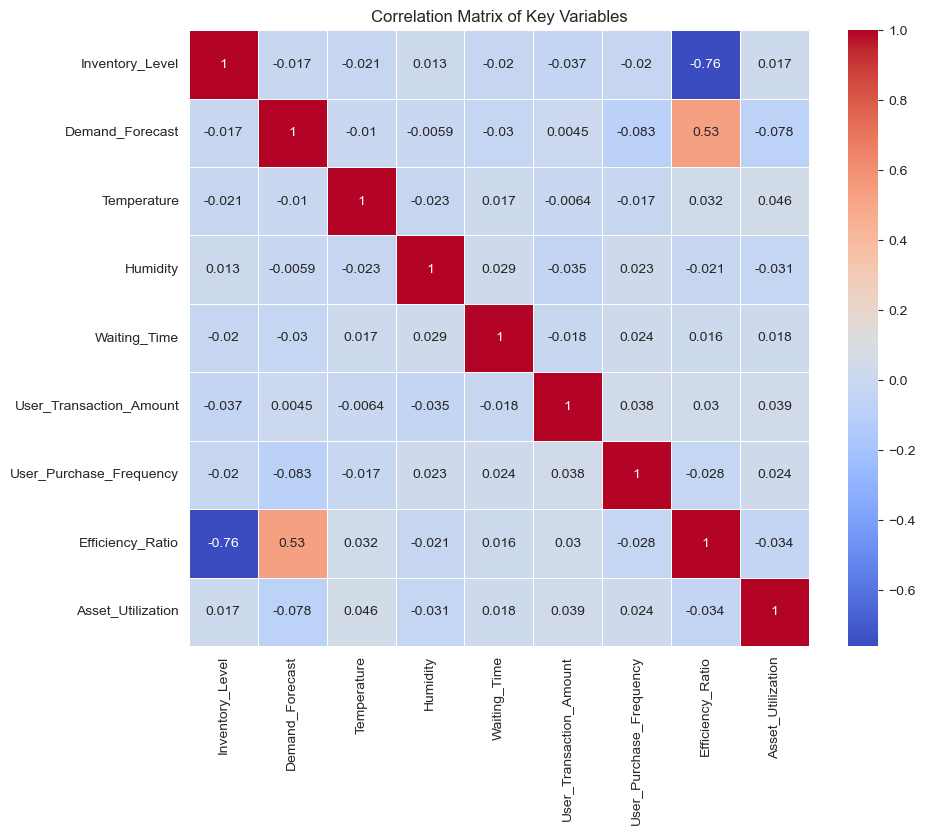

In [29]:
#Correlation Matrix Heatmap
plt.figure(figsize = (10,8))
corr = data [['Inventory_Level', 'Demand_Forecast', 'Temperature', 'Humidity',
           'Waiting_Time', 'User_Transaction_Amount', 'User_Purchase_Frequency',
           'Efficiency_Ratio', 'Asset_Utilization']].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidth = 0.5)
plt.title('Correlation Matrix of Key Variables')
plt.show()

### Correlation Insights
- The only field that correlates positively and moderately with 'Demand_Forecasting' is 'Efficiency_Ratio' with a value of 0.53
- All other variables show very weak or no correlation at all with 'Deman_Forecasting'
- This shows an amazing fact that variables such as 'Weather' or 'Inventory' are not directly tied to  **demand**
- **Efficiency Ratio** is more relevant and should be prioritized in future modelling efforts.

In [31]:
data.to_csv('../data/smart_logistics_dataset_cleaned.csv', index=False)